### Aufgabe 

Entwerfen Sie ein Programm, welches das Signal aus der Datei <code>signal.txt</code> vom Rauschen befreit. Üblicherweise ist die einfachste Möglichkeit Signale zu filtern, indem man Sie im Fourierraum mti einer frequenzabhängigen Filterfunktion multipliziert.

Gehen Sie wie folgt vor:
* Fourier-Transformieren Sie das Signal mit <code>np.fft.fft()</code> und verwenden Sie <code>np.fft.fftshift()</code> um die Koeffizienten umzusortieren.  

* Schauen Sie sich das Fourier-Spektrum des Signals an und identifizieren Sie die Stellen im Fourierraum, an denen Sie das Rauschen vermuten.

* Die Fourier-Koeffizienten der Moden, die Sie als für das Rauschen verantwortich identifiziert haben, müssen nun auf 0 gesetzt werden. Alle anderen Moden sollten möglichst nicht verändert werden. Am einfachsten lässt sich dies bewerkstelligen, in dem Sie die Fourierkoeffizienten mit einer Filterfunktion multiplizieren. Diese Filterfunktion sollte dort wo sie Filtern wollen den Wert 0 haben und dort wo Sie nichts verändern wollen den Wert 1. Dies lässt sich mit sog. Super-Gauss Funktionen der Gestalt $f(x) = \exp(-(x/\sigma)^n)$ mit geraden $n > 2$ erreichen.
* Multiplizieren Sie die Fourier-Koeffizienten mit Ihrer Filterfunktion und transformieren Sie anschließend mit der inversen Fouriertransformation <code>np.fft.ifft()</code> zurück in die Zeit. Vor der Rücktransformation müssen Sie jedoch die Umsortierung der Moden rückgängig machen, was sich durch einen erneuten Aufruf von <code>np.fft.fftshift()</code> erreichen lässt. Angenommen in $fs$ sind die gefilterten Koeffizienten, so geht dies über
```Python
g = np.fft.ifft(np.fft.fftshift(fs))
```
* Vergleichen Sie das gefilterte mit dem originalen Signal

/opt/jupyterhub/lib64/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


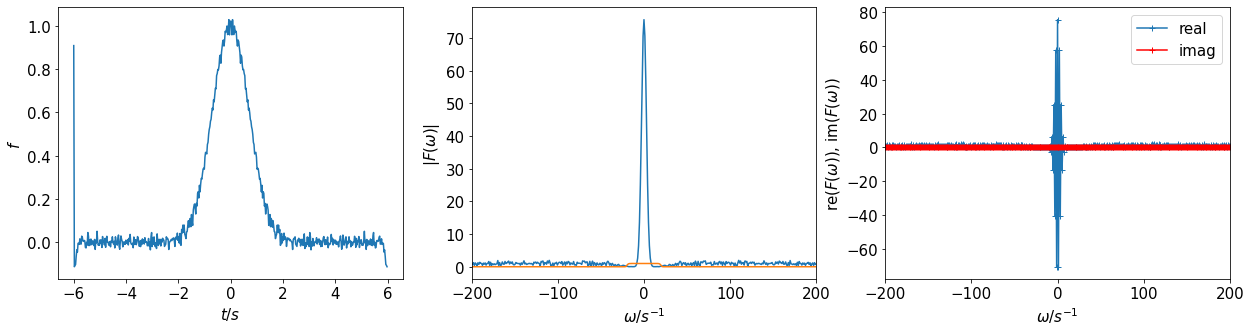

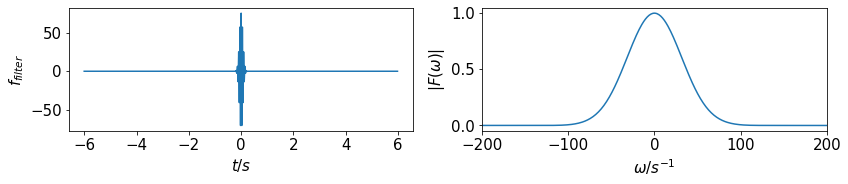

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Settings für Plots
plt.rcParams['font.size'] = 15;
plt.rcParams['figure.figsize'] = [5,5]  

A = np.loadtxt('data2.txt', delimiter=',')
t = A[:,0]
f = A[:,1]

N = f.shape[0]

dt = t[2]-t[1]
T = t[-1] + dt
dOm = 2*np.pi / T

om = dOm * np.arange(-N/2, N/2)

# Transformieren und umsortieren
FT = np.fft.fft(f)
F = np.fft.fftshift(FT)

fil = lambda x, sig, n : np.exp(-((x/sig)**n))
fs = F * fil(om,10,100)
g = np.fft.ifft(np.fft.fftshift(fs))
 

plt.figure(figsize=[21,5])

plt.subplot(1,3,1)
plt.plot(t, f, '-')
plt.ylabel('$f$')
plt.xlabel('$t/s$')

plt.subplot(1,3,2)
plt.plot(om, np.abs(F), '-', om, fil(om,20,20))
plt.ylabel('$|F(\omega)|$')
plt.xlabel('$\omega/s^{-1}$')
plt.xlim([-200, 200])

plt.subplot(1,3,3)
plt.plot(om, np.real(F), '+-', om, np.imag(F), 'r+-')
plt.legend(['real','imag'])
plt.ylabel('re($F(\omega)$), im($F(\omega)$)')
plt.xlabel('$\omega/s^{-1}$')
plt.xlim([-200, 200])

plt.figure(figsize=[21,5])

plt.subplot(2,3,1)
plt.plot(t, fs, '-')
plt.ylabel('$f_{filter}$')
plt.xlabel('$t/s$')

plt.subplot(2,3,2)
plt.plot(om, np.abs(g), '-')
plt.ylabel('$|F(\omega)|$')
plt.xlabel('$\omega/s^{-1}$')
plt.xlim([-200, 200])


plt.show()

/opt/jupyterhub/lib64/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


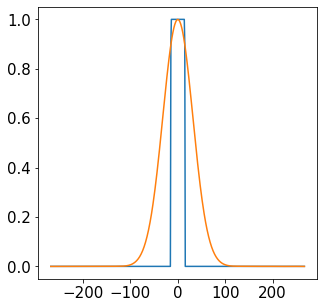

In [59]:
plt.plot(om,fil(om,15,100))
plt.plot(om,g)
plt.show()